<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Klasyfikator-wieloklasowy-softmax" data-toc-modified-id="Klasyfikator-wieloklasowy-softmax-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Klasyfikator wieloklasowy softmax</a></span><ul class="toc-item"><li><span><a href="#Zbiór-danych-cyfry-(digits)" data-toc-modified-id="Zbiór-danych-cyfry-(digits)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Zbiór danych cyfry (digits)</a></span></li><li><span><a href="#Przygotowanie-zbioru-treningowego" data-toc-modified-id="Przygotowanie-zbioru-treningowego-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Przygotowanie zbioru treningowego</a></span></li><li><span><a href="#Kodowanie-etykiet-klas-one-hot" data-toc-modified-id="Kodowanie-etykiet-klas-one-hot-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Kodowanie etykiet klas one-hot</a></span></li><li><span><a href="#Transfromacja-odwrotna" data-toc-modified-id="Transfromacja-odwrotna-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Transfromacja odwrotna</a></span></li><li><span><a href="#Zbiór-treningowy-i-zbiór-testowy" data-toc-modified-id="Zbiór-treningowy-i-zbiór-testowy-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Zbiór treningowy i zbiór testowy</a></span></li><li><span><a href="#Klasyfikator-softmax" data-toc-modified-id="Klasyfikator-softmax-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Klasyfikator softmax</a></span></li><li><span><a href="#Funkcja-softmax" data-toc-modified-id="Funkcja-softmax-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Funkcja softmax</a></span></li><li><span><a href="#Ćwiczenie" data-toc-modified-id="Ćwiczenie-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Ćwiczenie</a></span></li><li><span><a href="#Poprawiony-softmax" data-toc-modified-id="Poprawiony-softmax-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Poprawiony softmax</a></span></li><li><span><a href="#Funkcja-kosztu-entropia-krzyżowa" data-toc-modified-id="Funkcja-kosztu-entropia-krzyżowa-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Funkcja kosztu entropia krzyżowa</a></span></li><li><span><a href="#Aktualiacja-wag-zgodnie-z-regułą-delta" data-toc-modified-id="Aktualiacja-wag-zgodnie-z-regułą-delta-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Aktualiacja wag zgodnie z regułą delta</a></span><ul class="toc-item"><li><span><a href="#Ćwiczenie:-implementacja" data-toc-modified-id="Ćwiczenie:-implementacja-1.11.1"><span class="toc-item-num">1.11.1&nbsp;&nbsp;</span>Ćwiczenie: implementacja</a></span></li></ul></li><li><span><a href="#Algorytm-uczenia" data-toc-modified-id="Algorytm-uczenia-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Algorytm uczenia</a></span></li><li><span><a href="#Trening-klasyfikatora" data-toc-modified-id="Trening-klasyfikatora-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>Trening klasyfikatora</a></span></li><li><span><a href="#Wizualizacja-błędnych-przypadków" data-toc-modified-id="Wizualizacja-błędnych-przypadków-1.14"><span class="toc-item-num">1.14&nbsp;&nbsp;</span>Wizualizacja błędnych przypadków</a></span><ul class="toc-item"><li><span><a href="#Ćwiczenie" data-toc-modified-id="Ćwiczenie-1.14.1"><span class="toc-item-num">1.14.1&nbsp;&nbsp;</span>Ćwiczenie</a></span></li></ul></li><li><span><a href="#Poprawka-funkcji-kosztu-entropii-krzyżowej" data-toc-modified-id="Poprawka-funkcji-kosztu-entropii-krzyżowej-1.15"><span class="toc-item-num">1.15&nbsp;&nbsp;</span>Poprawka funkcji kosztu entropii krzyżowej</a></span><ul class="toc-item"><li><span><a href="#Ćwiczenie" data-toc-modified-id="Ćwiczenie-1.15.1"><span class="toc-item-num">1.15.1&nbsp;&nbsp;</span>Ćwiczenie</a></span></li></ul></li></ul></li></ul></div>

# Klasyfikator wieloklasowy softmax


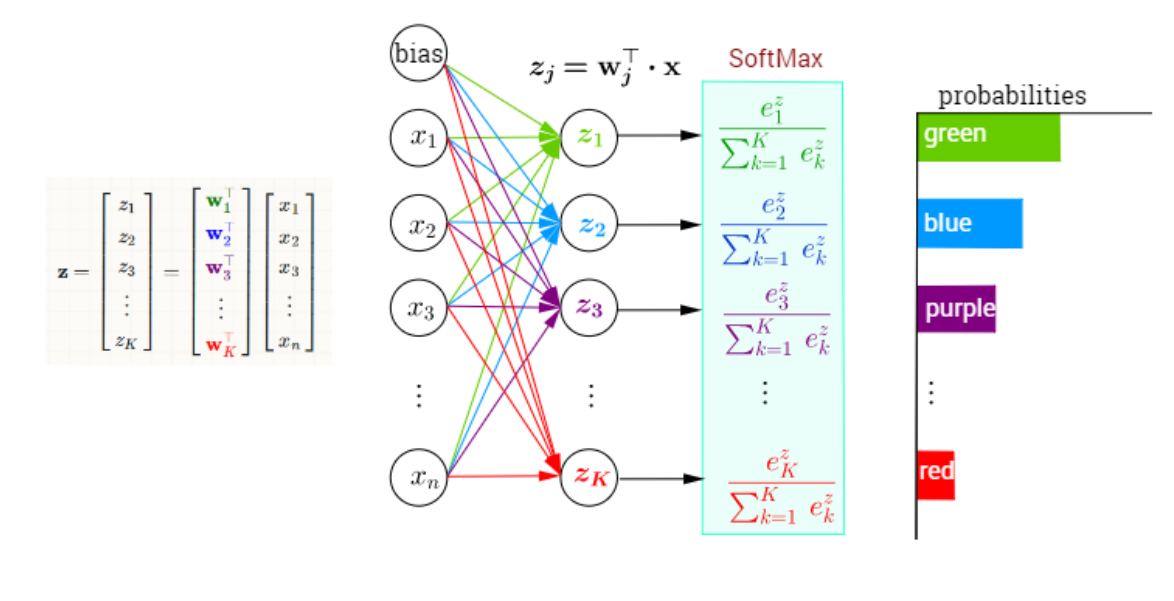

## Zbiór danych cyfry (digits)

* Informacje o zb. danych:  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html 
* 1797 małych czarno-białych obrazków cyfr
* obrazy 8x8 (64 piksele) 
* 10 klas, cyfry od 0 do 9

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
print('Wymiar danych: ', digits.images.shape)

N, w, h = digits.images.shape
d = w * h                     # number of pixels
print(f'Przypadków: {N}')
print(f'Zmiennych (piksele): {d} ({w}x{h})')

c = len(digits.target_names)  # number of classes
print(f'Klasy: {c} ({digits.target_names})')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(digits.images[i, :], cmap="gray")
    plt.title("Label: "+ str(digits.target[i]))
plt.show()

## Przygotowanie zbioru treningowego

In [ ]:
X = digits.images.reshape((N, d))
print('Rozmiar danych', X.shape)

In [ ]:
labels = digits.target
print('Etykiety: ', labels)
print(labels.shape)

## Kodowanie etykiet klas one-hot 

Tworzymy wektor binarny o $k$ składowych, gdzie $k$ jest liczbą klas. Wektor posiada niezerową wartość na pozycji odpowiadającej $i$-tej klasie. 

$$ 0 \rightarrow [1, 0, 0, 0, 0, 0, 0, 0, 0, 0] $$
$$ 1 \rightarrow [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] $$
$$ \ldots $$
$$ 9 \rightarrow [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] $$






In [ ]:
from sklearn.preprocessing import OneHotEncoder

t = OneHotEncoder()
y = t.fit_transform(labels[:, np.newaxis])    # potrzebny ksztalt (n_vec, 1)
y = y.toarray()                               # zamiana macierzy rzadkiej na gęstą 
print(y)
print(y.shape)

## Transfromacja odwrotna

In [ ]:
# transformacja odwrotna
t.inverse_transform(y)

In [ ]:
# lub
np.argmax(y, axis=1)

## Zbiór treningowy i zbiór testowy

* zbiór treninogwy zostanie uzyty do zbudowania modelu (metoda ``fit(X_train, y_train)``)
* zbiór testowy uzyjemy do sprawdzenia genralizacji wytrenowanego modelu (metoda ``predict(X_test)``)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3)

print(f'Zbiór treningowy: {X_train.shape}')
print(f'Zbiór testowy: {X_test.shape}')

## Klasyfikator softmax


$$
\mathbf{z}= \mathbf{W} \mathbf{x}+\mathbf{b}
$$


$$
\operatorname{softmax}(\mathbf{z})_i = \frac{\exp \left(z_i\right)}{\sum_k \exp \left(z_k\right)}
$$

## Funkcja softmax

In [ ]:
def softmax(z):
    e = np.exp(z)
    return e/np.sum(e)

In [ ]:
z = np.array([-1, 0.1, 2])
print(softmax(z))

## Ćwiczenie

Przetestuj działanie funkcij softmax dla prypadków:
* zwiększ wszystkie składowe $\mathbf{z}$ o stałą wartość, np. $\mathbf{z} + 100$
* wszystkie składowe $\mathbf{z}$ takie same
* jedna ze składowych $\mathbf{z}$ większa od 800. Jak naprawić działanie ``softmax()`` dla takich wartości?




## Poprawiony softmax


$$
\operatorname{softmax}(\mathbf{z})_i = \frac{ \exp z_i - \max (\mathbf{z}) }{ \sum_k \exp z_j - \max (\mathbf{z}) }
$$

In [ ]:
def softmax(z):
    e = np.exp(z - z.max())
    return e/np.sum(e)

In [ ]:
z = np.array([1, 1, 1e100])

print(softmax(z))

## Funkcja kosztu entropia krzyżowa 


$$J(\mathbf{W}, \mathbf{b})=-\mathbf{y} \cdot \log f(\mathbf{x})=-\log \operatorname{softmax} (\mathbf{z})_i$$

jezeli $\mathbf{x}$ nalezy do klasy $i$ i wektor $\mathbf{y}$ jest wektorem binarnym (one-hot) posiadającycm 1 na $i$-tej pozycji.

Oznaczmy $\mathbf{h} = \operatorname{softmax} (\mathbf{z})$ wektor aktywacji warstwy wyjściowej.
$$J=-\log h_i$$


## Aktualiacja wag zgodnie z regułą delta

$$
\begin{gathered}
\boldsymbol{\delta} = \mathbf{y}-\mathbf{h}\\
\Delta W=\eta \,\boldsymbol{\delta} \cdot \mathbf{x}^T \\
\Delta \mathbf{b}=\eta \, \boldsymbol{\delta}
\end{gathered}
$$

gdzie $\boldsymbol{\delta} \cdot \mathbf{x}^T$ jest iloczynem zewnetrznym (outer product)  wektorów, którego wynikiem jest macierz o rozmiarze takim jak $\mathbf{W}$.  
* $\boldsymbol{\delta}$ wymiar $c \times 1$
* $\mathbf{x}$ wymiar $d \times 1$


$$
\boldsymbol{\delta} \cdot \mathbf{x}^T=\left[\begin{array}{cccc}
\delta_1 x_1 & \delta_1 x_2 & \ldots & \delta_1 x_d \\
\delta_2 x_1 & \delta_2 x_2 & \ldots & \delta_2 x_d \\
\vdots & \vdots & \ddots & \vdots \\
\delta_c x_1 & \delta_c x_2 & \ldots & \delta_c x_d
\end{array}\right]
$$

### Ćwiczenie: implementacja

Zaimplementuj klasyfikator softmax korzystając z poniższego szablonu klasy
* parametry konstruktora: ``eta`` współczynnik uczenia, ``n_epochs`` liczba epok uczenia
* ``self.losses`` lista zapamietanych wartość funkcji kosztu $J$ na koniec każdej epoki
* ``self.accuracies`` lista zapamiętanych wartości poprawności klasyfikacji zbioru uczącego wyznaczona na koniec epoki
* ``fit(X, y)`` algorytm uczenia. Uczenie trwa przez ``n_epochs`` epok, gdzie w każdej epoce prezentowane są jednokrotnie wszystkie przypadki ze zbioru uczącego w losowej kolejności
* ``predict(X)`` zwraca predykcję, etykiety klas

In [ ]:
class SoftmaxClassifier:
    
    def __init__(self, n_epochs, eta):
        
        self.n_epochs = n_epochs   # ilość epok
        self.eta = eta             # stała uczenia
    
    def accuracy(self, X, y):
        # poprawnośc klasyfikacji 
        return (self.predict(X) == y).mean()

    def predict(self, X):
        # TODO: zwraca etykiety klas 
        pass
               
    def fit(self, X, y):
        
        self.losses = []
        self.accuracies = []
        
        # TODO: algorytm uczenia 

        return self

## Algorytm uczenia

Dane: zbiór treningowy $n$ wektorów $\mathbf{x}_i$ o $d$ zmiennych. Etykiety $y_i$ określają przynalezność do jednej z $c$ klas.  

Parametry początkowe: $\eta$ stała uczenia, $N$ ilość epoch. 

Zaimplementuj metodę ``fit(X, y)`` realizującą uczenie wsteczną propagacją zgodnie z poniższym algorytmem:

1. Zamień etykiety $y$ do postaci wektora _one-hot_ $\mathbf{y}_{onehot}$
2. Zainicjuj macierz wag $\mathbf{W}$ (wymiary  $c \times d$) i wektor wyrazów wolnych $\mathbf{b}$ (wymiary $c \times 1$) (metoda ``init(X,y)``) <br>
3. Powtarzaj $N$ razy:
4. <ul>Dla każdego $\mathbf{x}$ ze zbioru treningowego wykonaj</ul>
5. <ul><ul>propagacja sygnału:  (zaimplementuj metodę feedforward(x))<br>  
   $\mathbf{h} = \operatorname{softmax}\left(\mathbf{W} \mathbf{x} + \mathbf{b}\right)$  <br>
   </ul></ul>
6. <ul><ul>oblicz sygnał błędu (metoda backprop(y))<br>  
   $\boldsymbol{\delta} = \mathbf{y}_{onehot} - \mathbf{h}$</ul></ul>  
7. <ul><ul>aktualizacja wag (metoda update(x))<br>  
   $\mathbf{W} \leftarrow \mathbf{W} + \eta \, \boldsymbol{\delta} \cdot \mathbf{x}^T$  <br>
   $\mathbf{b} \leftarrow \mathbf{b} + \eta \, \boldsymbol{\delta}$  </ul></ul>
8. <ul>na koniec epoki oblicz i zachowaj wartość funkcji kosztu $J$ oraz poprawność klasyfikacji <br>
   $J = -\sum_{i=1}^{n}\mathbf{y}_i \log{f(\mathbf{x}_i}) $  </ul>

In [ ]:
class Soft(SoftmaxClassifier):
    
    def init(self, X, y):
        
        # TODO utworzenie i zainicjowanie wag
        return self
    
    def feedforward(self, x):
        
        # TODO: propagacja sygnału sygnału 
        # zwraca wyjscie sieci
    
    def backprop(self, y_one):
        
        # TODO: propagacja wsteczna sygnału błedu 
        return self
    
    def update(self, x):
        
        # TODO: aktualizacja wag
        return self

    def predict(self, X):
        
         # TODO: zwraca etykiety klas 

    def fit(self, X, y):
        
        self.accuracies = []
        self.losses = []
        
        # TODO: algorytm uczenia 
        return self

## Trening klasyfikatora

In [ ]:
sc = Soft(100, 0.001)
sc.fit(X_train, y_train)

print('Poprawność klasyfikacji trening ', sc.accuracy(X_train, y_train))
print('Poprawność klasyfikacji test    ', sc.accuracy(X_test, y_test))

import matplotlib.pyplot as plt
plt.plot(sc.accuracies)
plt.title("Poprawność klasyfikacji")
plt.show()

plt.plot(sc.losses)
plt.title("Funkcja kosztu cross-entropy")
plt.show()

## Wizualizacja błędnych przypadków

In [ ]:
y_pred = sc.predict(X_test)
misclassified = np.where(y_pred != y_test)[0]

n = len(misclassified)
n_cols = 8
n_rows = 1 + n // 8

plt.figure(figsize=(3 * n_cols, 3 * n_rows))
for i in range(n): 
    k = misclassified[i] 
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(X_test[i, :].reshape((8, 8)), cmap="gray")
    plt.title("Label " + str(y_test[i]) + " ; Prediction " + str(y_pred[i]))
    
plt.show()

### Ćwiczenie

Wytrenuj klasyfikator z uzyciem róznych wartości stałej uczenia $\eta = \{0.1, \, 0.0001, \, 1.0\}$. 
* Porównaj poprwaność uzyskiwaną na zbiorze testowym
* Dla dużej stałej uczenia wartość kosztu może przyjmowac wartości ``Inf``, dlaczego? Jak to naprawić?
* Czy możesz stwierdzić , czy uzyskane modele są przetrenowane?

## Poprawka funkcji kosztu entropii krzyżowej


$$
\begin{aligned}
\log \left(\operatorname{softmax}(\mathbf{z})_i\right) & =\log \left(\frac{e^{z_i-\max (\mathbf{z})}}{\sum_j e^{z_j-\max (\mathbf{z})}}\right) \\
& = z_i-\max (\mathbf{z})-\log \left(\sum_j e^{z_j- \max (\mathbf{z})}\right)
\end{aligned}
$$


In [ ]:
def log_softmax(x):
    x_max = np.max(x)
    return x - x_max - np.log(np.sum(np.exp(x - x_max)))

z = np.array([1e3, 1, 1])
print(-np.log(softmax(z)))

print(-log_softmax(z))

### Ćwiczenie

Popraw implementację klasyfikatora softmax zapewniając numerycznie stabilną wersję wyznaczania wartości funkcji kosztu